## Cleaning Chicago City Traffic Crashes Data

In [32]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import warnings
import datetime
warnings.filterwarnings('ignore')

In [33]:
#Using Utilities Library made by Srihari Seshadri
from Utils.DataUtils import *
from Utils.UtilsViz import *
from Utils.pipeline_utils import *

In [34]:
print("Current Working Directory: " , os.getcwd())

Current Working Directory:  /Users/michaelsetyawan/Desktop/UCHICAGO/Classes/DEPA


In [35]:
os.chdir("/Users/michaelsetyawan/Desktop/UCHICAGO/Classes/DEPA")
print("Current Working Directory: " , os.getcwd())

Current Working Directory:  /Users/michaelsetyawan/Desktop/UCHICAGO/Classes/DEPA


In [36]:
df=pd.read_csv('Crash_Chicago.csv')
pd.to_datetime(df['CRASH_DATE']).sort_values(ascending=False)

355787   2019-11-06 02:01:00
355786   2019-11-06 00:02:00
355785   2019-11-05 23:24:00
355784   2019-11-05 22:04:00
355783   2019-11-05 22:00:00
                 ...        
4        2014-06-25 19:00:00
3        2014-02-24 19:45:00
2        2014-01-21 07:40:00
1        2014-01-18 18:14:00
0        2013-03-03 16:48:00
Name: CRASH_DATE, Length: 355788, dtype: datetime64[ns]

In [37]:
#columns of interest to analyze based on team discussion 
col_interest=['RD_NO','CRASH_DATE_EST_I','CRASH_DATE','FIRST_CRASH_TYPE','LANE_COUNT','CRASH_TYPE', 'INTERSECTION_RELATED_I',
             'DAMAGE','STREET_NO','STREET_DIRECTION', 'STREET_NAME','NUM_UNITS','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
             'LATITUDE', 'LONGITUDE', 'LOCATION']

In [38]:
#filter df based on col_interest
for col in df.columns:
    if col not in col_interest:
        df=df.drop([col],axis=1)
display(df.shape,df.head(),df.columns)

(355788, 17)

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,FIRST_CRASH_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,DAMAGE,STREET_NO,STREET_DIRECTION,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC172482,NaN,3/3/13 16:48,SIDESWIPE OPPOSITE DIRECTION,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",3200,W,FOSTER AVE,2.0,16,1,3,41.975857,-87.708744,POINT (-87.708743641643 41.975856915535)
1,JB442550,NaN,1/18/14 18:14,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",415,W,LAKE ST,2.0,18,7,1,41.885610,-87.638756,POINT (-87.638756189808 41.885609917063)
2,HZ122950,NaN,1/21/14 7:40,ANGLE,INJURY AND / OR TOW DUE TO CRASH,NaN,"OVER $1,500",7400,S,EXCHANGE AVE,2.0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223)
3,HZ164689,NaN,2/24/14 19:45,TURNING,NO INJURY / DRIVE AWAY,NaN,"$501 - $1,500",199,N,SACRAMENTO BLVD,2.0,19,2,2,41.884016,-87.701143,POINT (-87.701142757538 41.884016475152)
4,JC321679,NaN,6/25/14 19:00,SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,NaN,"$501 - $1,500",3132,S,PULASKI RD,2.0,19,4,6,41.835886,-87.724474,POINT (-87.724474013253 41.835886103363)


Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'FIRST_CRASH_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'DAMAGE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'NUM_UNITS', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [39]:
date = pd.to_datetime(df['CRASH_DATE']) 
df['CRASH_DATE']=date
df['CRASH_YEAR'] = [i.year for i in df['CRASH_DATE']]
df.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,FIRST_CRASH_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,DAMAGE,STREET_NO,STREET_DIRECTION,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR
0,JC172482,NaN,2013-03-03 16:48:00,SIDESWIPE OPPOSITE DIRECTION,INJURY AND / OR TOW DUE TO CRASH,Y,"OVER $1,500",3200,W,FOSTER AVE,2.0,16,1,3,41.975857,-87.708744,POINT (-87.708743641643 41.975856915535),2013
1,JB442550,NaN,2014-01-18 18:14:00,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,NaN,"OVER $1,500",415,W,LAKE ST,2.0,18,7,1,41.885610,-87.638756,POINT (-87.638756189808 41.885609917063),2014
2,HZ122950,NaN,2014-01-21 07:40:00,ANGLE,INJURY AND / OR TOW DUE TO CRASH,NaN,"OVER $1,500",7400,S,EXCHANGE AVE,2.0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223),2014
3,HZ164689,NaN,2014-02-24 19:45:00,TURNING,NO INJURY / DRIVE AWAY,NaN,"$501 - $1,500",199,N,SACRAMENTO BLVD,2.0,19,2,2,41.884016,-87.701143,POINT (-87.701142757538 41.884016475152),2014
4,JC321679,NaN,2014-06-25 19:00:00,SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,NaN,"$501 - $1,500",3132,S,PULASKI RD,2.0,19,4,6,41.835886,-87.724474,POINT (-87.724474013253 41.835886103363),2014


##### Analyze NaN values within features of interest

In [40]:
nan_df = analyse_nans(df)
nan_df_t = nan_df.T
nan_df_t.sort_values(by="percentage", inplace=True, ascending=False)
nan_df_t = nan_df_t[nan_df_t["percentage"]!=0]

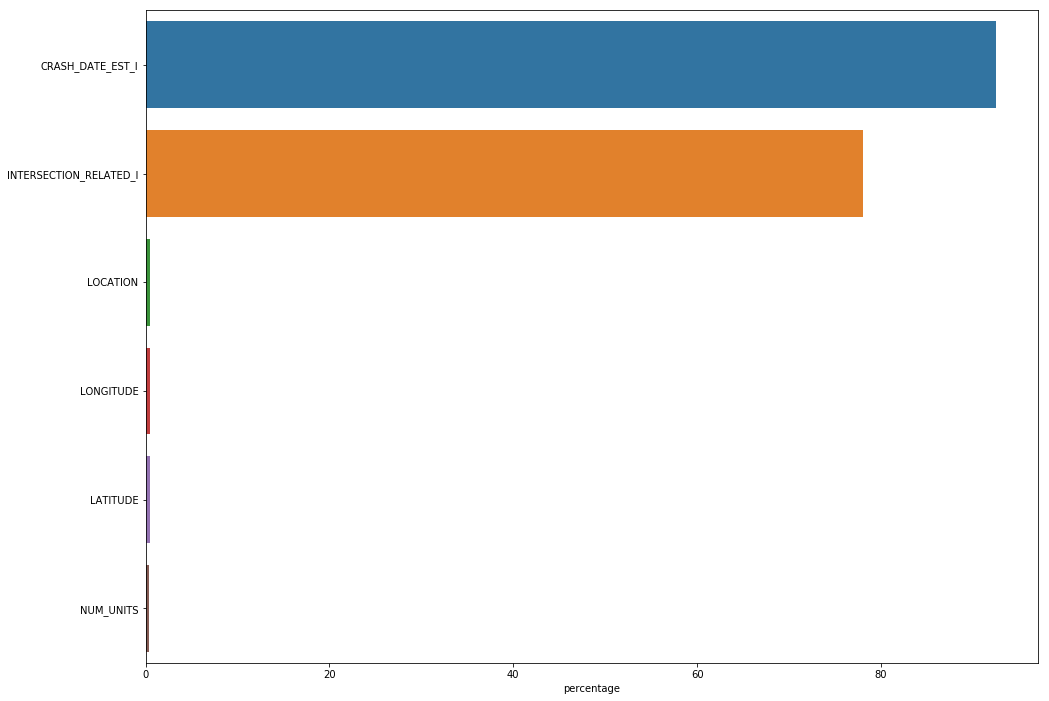

In [41]:
#plot percentage of NaN values
f, ax = plt.subplots(1,1,figsize=(16,12))
g = sns.barplot(y=nan_df_t.index, x=nan_df_t.percentage, ax=ax)

In [42]:
#check the count of NaN values from above plot
nan_df.loc["total",(nan_df.loc["total",:]>0)].sort_values(ascending=False)

CRASH_DATE_EST_I          329258
INTERSECTION_RELATED_I    277753
LOCATION                    1811
LONGITUDE                   1811
LATITUDE                    1811
NUM_UNITS                   1248
STREET_DIRECTION               2
STREET_NAME                    1
Name: total, dtype: object

##### Remove Crash_Date_Estimated, Intersection_Related as they are not relevant information

In [43]:
df=df.drop(['CRASH_DATE_EST_I','INTERSECTION_RELATED_I'],axis=1)
df.head()

,RD_NO,CRASH_DATE,FIRST_CRASH_TYPE,CRASH_TYPE,DAMAGE,STREET_NO,STREET_DIRECTION,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR
0,JC172482,2013-03-03 16:48:00,SIDESWIPE OPPOSITE DIRECTION,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",3200,W,FOSTER AVE,2.0,16,1,3,41.975857,-87.708744,POINT (-87.708743641643 41.975856915535),2013
1,JB442550,2014-01-18 18:14:00,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,"OVER $1,500",415,W,LAKE ST,2.0,18,7,1,41.885610,-87.638756,POINT (-87.638756189808 41.885609917063),2014
2,HZ122950,2014-01-21 07:40:00,ANGLE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",7400,S,EXCHANGE AVE,2.0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223),2014
3,HZ164689,2014-02-24 19:45:00,TURNING,NO INJURY / DRIVE AWAY,"$501 - $1,500",199,N,SACRAMENTO BLVD,2.0,19,2,2,41.884016,-87.701143,POINT (-87.701142757538 41.884016475152),2014
4,JC321679,2014-06-25 19:00:00,SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,"$501 - $1,500",3132,S,PULASKI RD,2.0,19,4,6,41.835886,-87.724474,POINT (-87.724474013253 41.835886103363),2014


##### Dropping Rows with 2000 or less NaN values

In [44]:
df=df.dropna()
df.head()

,RD_NO,CRASH_DATE,FIRST_CRASH_TYPE,CRASH_TYPE,DAMAGE,STREET_NO,STREET_DIRECTION,STREET_NAME,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR
0,JC172482,2013-03-03 16:48:00,SIDESWIPE OPPOSITE DIRECTION,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",3200,W,FOSTER AVE,2.0,16,1,3,41.975857,-87.708744,POINT (-87.708743641643 41.975856915535),2013
1,JB442550,2014-01-18 18:14:00,PARKED MOTOR VEHICLE,NO INJURY / DRIVE AWAY,"OVER $1,500",415,W,LAKE ST,2.0,18,7,1,41.885610,-87.638756,POINT (-87.638756189808 41.885609917063),2014
2,HZ122950,2014-01-21 07:40:00,ANGLE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",7400,S,EXCHANGE AVE,2.0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223),2014
3,HZ164689,2014-02-24 19:45:00,TURNING,NO INJURY / DRIVE AWAY,"$501 - $1,500",199,N,SACRAMENTO BLVD,2.0,19,2,2,41.884016,-87.701143,POINT (-87.701142757538 41.884016475152),2014
4,JC321679,2014-06-25 19:00:00,SIDESWIPE SAME DIRECTION,NO INJURY / DRIVE AWAY,"$501 - $1,500",3132,S,PULASKI RD,2.0,19,4,6,41.835886,-87.724474,POINT (-87.724474013253 41.835886103363),2014


In [45]:
#Checking what are the differents first crash type and crash type
print(df['FIRST_CRASH_TYPE'].value_counts())
print(df['CRASH_TYPE'].value_counts())

REAR END                        87655
PARKED MOTOR VEHICLE            78452
SIDESWIPE SAME DIRECTION        57188
TURNING                         49242
ANGLE                           36940
FIXED OBJECT                    14846
PEDESTRIAN                       8094
PEDALCYCLIST                     5359
SIDESWIPE OPPOSITE DIRECTION     5272
OTHER OBJECT                     3266
HEAD ON                          2965
OTHER NONCOLLISION               1293
REAR TO FRONT                     924
REAR TO SIDE                      594
REAR TO REAR                      237
ANIMAL                            224
OVERTURNED                        168
TRAIN                              18
Name: FIRST_CRASH_TYPE, dtype: int64
NO INJURY / DRIVE AWAY              273205
INJURY AND / OR TOW DUE TO CRASH     79532
Name: CRASH_TYPE, dtype: int64


**Cleaning:**
Only use data from March 2018 to June 2019

In [48]:
df=df[((df['CRASH_YEAR']==2018)&(df['CRASH_MONTH']>=3)) | ((df['CRASH_YEAR']==2019)&(df['CRASH_MONTH']<=6))]
df.to_csv('Clean_Crash.csv')